In [29]:
# Need to do this before importing RV when running in a Docker container from VS Code.
# This has to do with the fact that VS Code is not setting env vars in the notebook correctly.
import os
os.environ['GDAL_DATA'] = '/opt/conda/lib/python3.7/site-packages/rasterio/gdal_data/'

In [30]:
from os.path import join

from rastervision.pytorch_learner.dataset import SemanticSegmentationSlidingWindowGeoDataset
from rastervision.pytorch_learner.visualizer import SemanticSegmentationVisualizer
from rastervision.core.data import ClassConfig

TRAIN_IDS = [
    '2_10', '2_11', '3_10', '3_11', '4_10', '4_11', '4_12', '5_10', '5_11',
    '5_12', '6_10', '6_11', '6_7', '6_9', '7_10', '7_11', '7_12', '7_7', '7_8',
    '7_9'
]
VAL_IDS = ['2_12', '3_12', '6_12']

CLASS_NAMES = [
    'Car', 'Building', 'Low Vegetation', 'Tree', 'Impervious', 'Clutter'
]
CLASS_COLORS = [
    '#ffff00', '#0000ff', '#00ffff', '#00ff00', '#ffffff', '#ff0000'
]

In [37]:
class_config = ClassConfig(names=CLASS_NAMES, colors=CLASS_COLORS)
channel_order = [0, 1, 2, 3]
channel_display_groups = {'RGB': (0, 1, 2), 'IR': (3, )}

scene_id = '2_10'
scene_id = scene_id.replace('-', '_')
raw_uri = 's3://raster-vision-raw-data/isprs-potsdam'
image_uri = join(raw_uri, f'4_Ortho_RGBIR/top_potsdam_{scene_id}_RGBIR.tif')
label_uri = join(raw_uri, f'5_Labels_for_participants/top_potsdam_{scene_id}_label.tif')

# TODO pass in a custom augmentation
ds = SemanticSegmentationSlidingWindowGeoDataset.from_uris(
    class_config=class_config,
    image_uri=image_uri,
    label_raster_uri=label_uri,
    size=300,
    stride=300,
    image_raster_source_kw={'channel_order': channel_order})

x, y = ds[0]

2022-08-31 20:32:02:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/4_Ortho_RGBIR/top_potsdam_2_10_RGBIR.tif.
2022-08-31 20:32:04:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/5_Labels_for_participants/top_potsdam_2_10_label.tif.
2022-08-31 20:32:04:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/4_Ortho_RGBIR/top_potsdam_2_10_RGBIR.tif.
2022-08-31 20:32:05:rastervision.pipeline.file_system.utils: INFO - Using cached file /opt/data/tmp/cache/s3/raster-vision-raw-data/isprs-potsdam/5_Labels_for_participants/top_potsdam_2_10_label.tif.


In [38]:
print(x.shape)
print(y.shape)

torch.Size([4, 300, 300])
torch.Size([300, 300, 3])


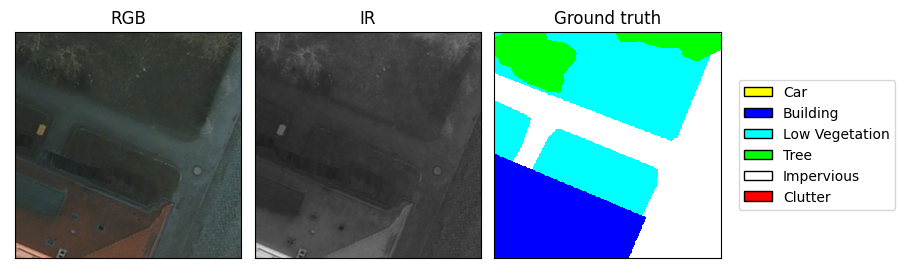

In [40]:
vis = SemanticSegmentationVisualizer(CLASS_NAMES, CLASS_COLORS, channel_display_groups=channel_display_groups)
vis.plot_batch(x.unsqueeze(0), y.unsqueeze(0), show=True)